# Exercise: POD on pictures of digits

POD can be applied to compress and classify images.

## Dataset

The dataset contains a number of low-resolution handwritten digits. 

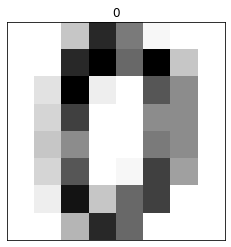

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def plot_image(image, label=None, cmap='Grays'):
    fig, ax = plt.subplots()
    ax.imshow(image.reshape(im_shape), cmap)
    ax.set_xticks([])
    ax.set_yticks([])

    if label is not None:
        ax.set_title(label)

    plt.show()

digits_images = load_digits().data  # images dataset size 1767x64
digits_labels = load_digits().target # images labels size 1767

n_samples = digits_labels.size
im_shape = (8,8)

plot_image(digits_images[0, :], digits_labels[0])

## To do:

- Split into training and test dataset
- Center the train dataset
- Apply the SVD
- Check the distribution of the eigenvalues
- Plot the clustering based on the first 2 eigenmodes
- Look at the distribution of the testing dataset

In [3]:
from sklearn.model_selection import train_test_split

# splitting the dataset
data_train, data_test, labels_train, labels_test = train_test_split(digits_images, digits_labels, 
                                                test_size=0.25, random_state=42)


# centering
D_train = data_train.T
D_m = np.mean(D_train, axis=1)[:, np.newaxis]
D0_train = D_train - D_m 

#svd
U, s, Vt = np.linalg.svd(D0_train, full_matrices=False)
A = np.dot(np.diag(s), Vt).T


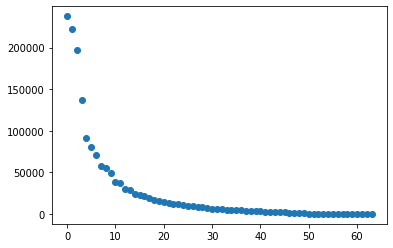

In [4]:
# Plot the distribution of the eigenvalues

plt.scatter(np.arange(64), s**2)
plt.show()

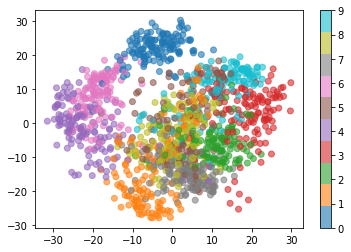

In [5]:
# Plot the distribution of the POD coefficients

im = plt.scatter(A[:, 0], A[:, 1], c=labels_train, cmap='tab10', alpha=0.6)
plt.colorbar(im)
plt.show()

## To do:
- Compute the low-dimensional projection of the first test image
- Plot the coefficients together with the coefficients of the training dataset.

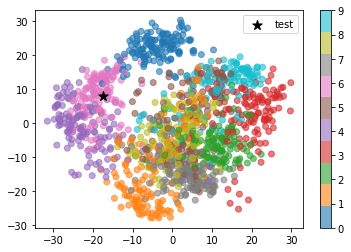

In [6]:
i_test = 0
d_test = data_test[[i_test], :].T
d0_test = d_test - D_m
a_test = np.dot(U.T, d0_test).T

im = plt.scatter(A[:, 0], A[:, 1], c=labels_train, cmap='tab10', alpha=0.6)
plt.scatter(a_test[:, 0], a_test[:, 1], c='k', s=100, marker='*', label='test')
plt.legend()
plt.colorbar(im)
plt.show()

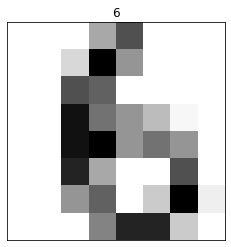

In [7]:
plot_image(data_test[i_test, :], labels_test[i_test])